# Week 7: Machine Learning

## Loading iris dataset from sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()

print(iris.keys())
print(iris.target_names)

X=iris.data
y=iris.target

print(type(X), type(y))
print(X.shape, y.shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
['setosa' 'versicolor' 'virginica']
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(150, 4) (150,)


## Loading iris dataset from the internal file 

In [2]:
iris=pd.read_csv("Iris_data.csv")
X=iris.drop('species',axis=1).values 

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(iris['species'].values)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## k-NN fit and predict with all Iris data

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X,y)

print("15NN accuary score of Iris data:", knn.score(X,y))

X_new=np.array([[5.1, 3.5, 1.4, 0.2],[5.9, 3. , 5.1, 1.8]])
prediction = knn.predict(X_new)
print("Prediction for X_new is", prediction)

15NN accuary score of Iris data: 0.9866666666666667
Prediction for X_new is [0 2]


## Measuring model performance

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.24,random_state=21)
print("Shapes of train and test sets:", X_train.shape,X_test.shape)

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Predicted labels: ", y_pred[:])
print("Ground truth    : ", y_test[:])

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

print("15NN accuary score of the test set:", knn.score(X_test,y_test))
print("15NN accuary score of the train set:", knn.score(X_train,y_train))

Shapes of train and test sets: (114, 4) (36, 4)
Predicted labels:  [1 0 0 0 1 1 0 2 0 0 1 1 2 2 0 2 1 1 0 2 2 1 2 1 0 1 0 0 1 2 0 2 1 0 2 1]
Ground truth    :  [1 0 0 0 1 1 0 2 0 0 1 1 2 2 0 1 2 1 0 2 2 1 1 1 0 1 0 0 1 2 0 2 1 0 2 1]
0.9166666666666666
15NN accuary score of the test set: 0.9166666666666666
15NN accuary score of the train set: 0.9824561403508771


## Model complexity and over/underfitting

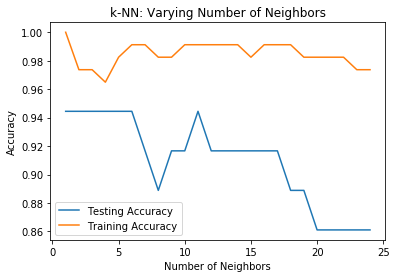

In [7]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


## Confusion matrix and Classification report

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(knn.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8611111111111112
[[13  0  0]
 [ 0 12  2]
 [ 0  1  8]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.92      0.86      0.89        14
          2       0.80      0.89      0.84         9

avg / total       0.92      0.92      0.92        36



## Classification Models 


In [ ]:
#   K-Nearest Neighbors (KNeighbors)
from sklearn.neighbors import KNeighborsClassifier

#     Logistic Regression
from sklearn.linear_model import LogisticRegression

#  Stochastic Gradient Descent Classifier (SGDC)
from sklearn.linear_model import SGDClassifier

#  Gaussian Naive Bayes (GaussianNB)
from sklearn.naive_bayes import GaussianNB

#  Decision Trees
from sklearn.tree import DecisionTreeClassifier

#  Support Vector Machines (SVM)
from sklearn.svm import SVC

# Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

## Logistic Regression vs SVM 

In [11]:
from sklearn import datasets
digits = datasets.load_digits()
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
print("Logistic Regression: score of training set", lr.score(Xtrain, ytrain))
print("Logistic Regression: score of training set", lr.score(Xtest, ytest))

# Apply SVM and print scores
svm = SVC()
svm.fit(Xtrain, ytrain)
print("SVM: score of training set", svm.score(Xtrain, ytrain))
print("SVM: score of training set", svm.score(Xtest, ytest))

Logistic Regression: score of training set 0.9977728285077951
Logistic Regression: score of training set 0.9377777777777778
SVM: score of training set 1.0
SVM: score of training set 0.37333333333333335


## Plot the Decision Boundaries

Automatically created module for IPython interactive environment


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


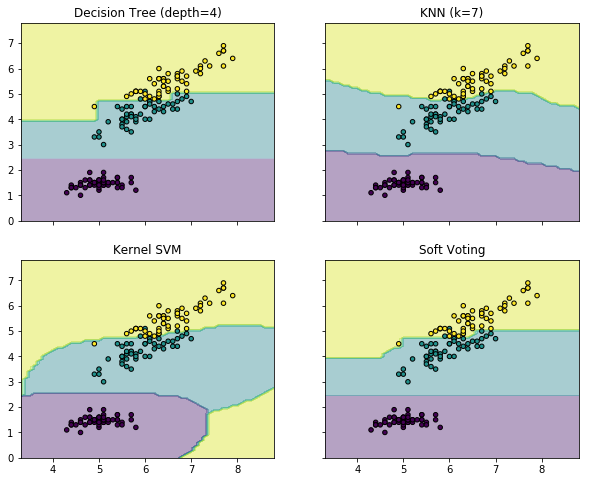

In [16]:
%matplotlib inline
print(__doc__)

from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

# KMeans

In [24]:
from sklearn.cluster import KMeans
iris=pd.read_csv("Iris_data.csv")
print(iris.head())

X=iris.drop('species',axis=1).values

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


## k-Means: fit and predict

In [30]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)

y_kmeans=kmeans.predict(X)
print("Lables of X:", y_kmeans)

sample=[[5.7, 4.4, 1.5, 0.4],[6.5, 3., 5.5, 1.8],[5.8, 2.7, 5.1, 1.9]]
y_sample=kmeans.predict(sample)
print("Lables of sample:", y_sample)

print("Inertia:", kmeans.inertia_)

Lables of X: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Lables of sample: [1 0 2]
Inertia: 78.94084142614601


## Visualising the clusters

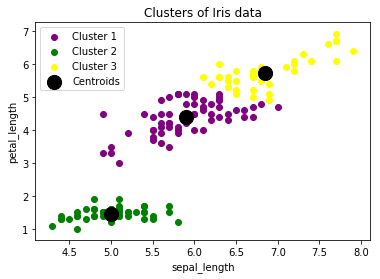

In [23]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 2], c = 'purple', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 2], c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 2], c = 'yellow', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s = 200, \
            c = 'black', label = 'Centroids')
plt.title('Clusters of Iris data')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()

## Elbow method

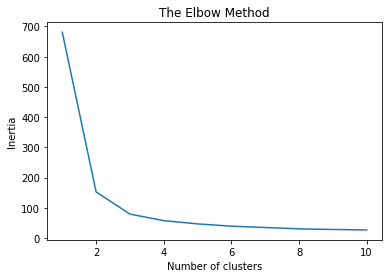

In [31]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans_e = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_e.fit(X)
    wcss.append(kmeans_e.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Evaluating a clustering

In [32]:
df=pd.DataFrame({'labels':y_kmeans,'species':iris.species})
print(df.head())

   labels      species
0       1  Iris-setosa
1       1  Iris-setosa
2       1  Iris-setosa
3       1  Iris-setosa
4       1  Iris-setosa


In [33]:
ct=pd.crosstab(df['labels'],df['species'])
print(ct)

species  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                               
0                  0                2              36
1                 50                0               0
2                  0               48              14
